### Regression using Neural Network

#### Objective:
- Use `Neural Network` to predict the homes price.

- Paremeters:
    - `x features`: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
    - `y label`: MedHouseVal


#### Main Concepts:

Neural Networks
- Forward propagation
- Backward propagation
- Activation function




In [1]:
import numpy as np
import pandas as pd
import neural_network
import matplotlib.pyplot as plt

Load dataset 

In [2]:
df = pd.read_csv('dataset_regression_housing\housing.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Data Viz

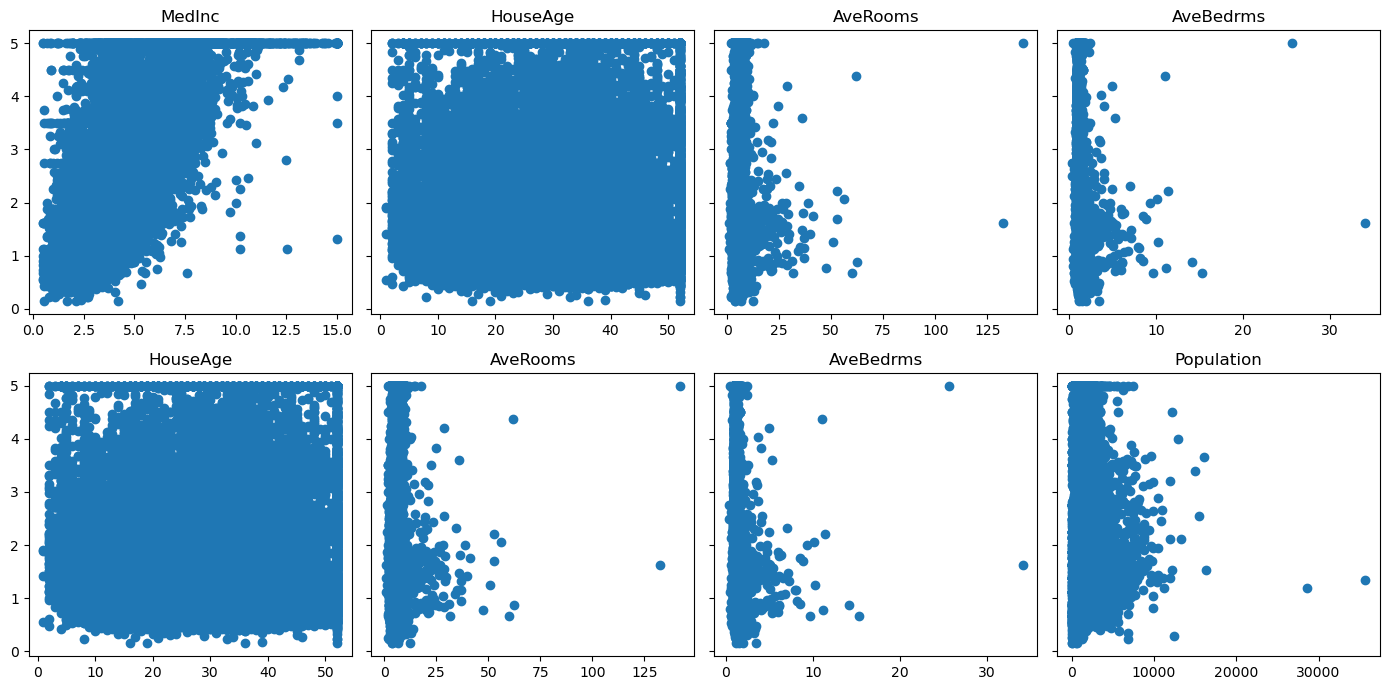

In [3]:
y= df['MedHouseVal'].values

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 7), sharey=True)
for row in range(0,2):
    for col in range(0,4):
        feature = df.columns[row+col]
        ax[row, col].scatter(df[feature].values, y)
        ax[row, col].set_title(feature)
plt.tight_layout()    
plt.show()

Split dateset into training and testing:

In [4]:
#Trainnning dataset:
df_train = df.sample(frac=.7,replace=False, random_state=0)

#Testing dataset:
df_test = df[~df.index.isin(df_train.index)]

In [5]:
df_train.shape

(14448, 9)

In [6]:
# Training dataset:

x_train = df_train.values[:,:-1]
y_train = df_train.values[:,-1].reshape(14448,1)

Train Model

Set Neural Network Model

In [43]:
# Neural Network 01:

# Hidden Layers:
layer_1= neural_network.NN_Layer(layer='layer_01', units=25, activation_func='relu')  # Activation Function: ReLU
layer_2= neural_network.NN_Layer(layer='layer_02', units=15, activation_func='relu')
# Output Layers:
layer_3= neural_network.NN_Layer(layer='layer_04', units=1, activation_func='linear') # Activation of the last layer: linear (no activation)

neural_net_01 = neural_network.NN([layer_1, layer_2, layer_3])

# alpha=5e-5
neural_net_01.train(features=x_train, 
                labels= y_train,
                alpha=5e-5,             # Learning Rate
                n_iterations=1000,     # Number of Iterations
                e=1e-8,                 # Minimal variance in cost to consider optimization has converged.
                print_cost=True, print_each=100)        # print cost each 100 iterations

[4.4001824e+11]
[722.30539196]
[715.13154877]
[708.02908828]
[700.99730022]
[694.03548136]
[687.14293547]
[680.31897327]
[673.56291231]
[666.87407696]


In [150]:
# Neural Net 02:
# Hidden Layer:
l_1 = neural_network.NN_Layer(layer='layer_01', units=36, activation_func='relu')
l_2 = neural_network.NN_Layer(layer='layer_02', units=150, activation_func='relu')
l_3 = neural_network.NN_Layer(layer='layer_03', units=200, activation_func='relu')
# Output Layer:
l_4 = neural_network.NN_Layer(layer='layer_04', units=1, activation_func='linear')

neural_net_02 = neural_network.NN([l_1, l_2, l_3, l_4])

# Trainning:

# alpha=1e-6:
neural_net_02.train(features=x_train,
                labels= y_train,
                alpha=1e-11,
                n_iterations=1000,
                e=1e-9,
                    print_cost=True, print_each=100)     # print cost each 100 iterations


[3.64965745e+18]
Optimization has converged!
Iteration: 
	3
Cost: 
	[2.51730561]


In [136]:
# Scale the features:

# Z-Score Normalization:
x_train_norm = (x_train - np.mean(x_train, axis=0))/np.std(x_train, axis=0)

In [170]:
# Neural Net 03:
# Hidden Layer:
hl_1 = neural_network.NN_Layer(layer='layer_01', units=500, activation_func='relu')
hl_2 = neural_network.NN_Layer(layer='layer_02', units=300, activation_func='relu')
hl_3 = neural_network.NN_Layer(layer='layer_03', units=250, activation_func='relu')
hl_4 = neural_network.NN_Layer(layer='layer_04', units=150, activation_func='relu')
hl_5 = neural_network.NN_Layer(layer='layer_05', units=8, activation_func='relu')
# Output Layer:
hl_6 = neural_network.NN_Layer(layer='layer_06', units=1, activation_func='linear')

neural_net_03 = neural_network.NN([hl_1, hl_2, hl_3, hl_4, hl_5, hl_6])

# Trainning:

# alpha=1e-6:
neural_net_03.train(features=x_train_norm,
                labels= y_train,
                alpha=5e-1,
                n_iterations=1000,
                e=1e-12,
                print_cost=True, print_each=10)   # print cost each 100 iterations

[1.5252671e+22]
[3.0060235e+15]
[2.86676741e+09]
[2735.30855359]
[1.34871472]
[1.34610742]
Optimization has converged!
Iteration: 
	57
Cost: 
	[1.34610741]


Evaluate Models

In [171]:
m, n = df_test.shape
x_test = df_test.values[:, :-1]
y_test = df_test.values[:, -1].reshape(-1, 1)

In [172]:
# Model 01:

y_hat_01 = neural_net_01.predict(x_test) 

error_01 = sum((1/m)*(y_test-y_hat_01)**2)

print(f'The error of this model_01 is: \n\t{error_01}')


The error of this model_01 is: 
	[660.3585282]


In [173]:
# Model 02:

y_hat_02 = neural_net_02.predict(x_test)

error_02 = sum((1/m)*(y_test-y_hat_02)**2)

print(f'The error of this model is: \n\t{error_02}')


The error of this model is: 
	[2.47533007]


In [174]:
# Model 03:

y_hat_03 = neural_net_03.predict((x_test - np.mean(x_train, axis=0))/np.std(x_train, axis=0))

error_03 = sum((1/m)*(y_test-y_hat_03)**2)

print(f'The error of this model is: \n\t{error_03}')

The error of this model is: 
	[1.29758645]


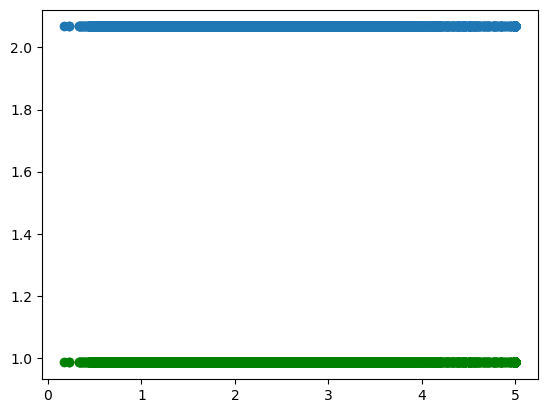

In [175]:
plt.scatter(y_test, y_hat_02, color='green')
plt.scatter(y_test, y_hat_03)


In [159]:
y_test

array([[3.585],
       [2.815],
       [2.418],
       ...,
       [0.67 ],
       [0.983],
       [1.168]])

In [160]:
y_hat_03

array([[2.06765059],
       [2.06765059],
       [2.06765059],
       ...,
       [2.06765059],
       [2.06765059],
       [2.06765059]])

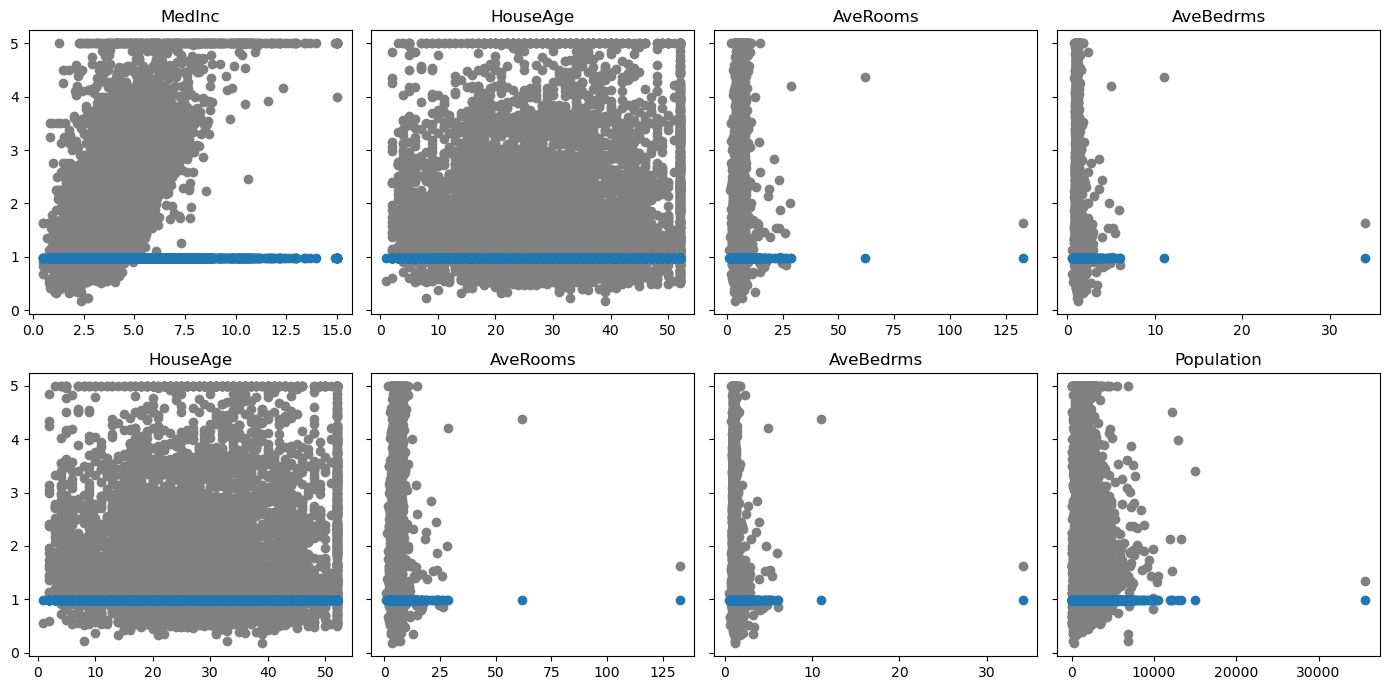

In [176]:
# Model 02:

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 7), sharey=True)
for row in range(0, 2):
    for col in range(0, 4):
        feature = df.columns[row+col]
        ax[row, col].scatter(df_test[feature].values, y_test, color='gray')
        ax[row, col].scatter(df_test[feature].values, y_hat_02, )
        ax[row, col].set_title(feature)
plt.tight_layout()
plt.show()


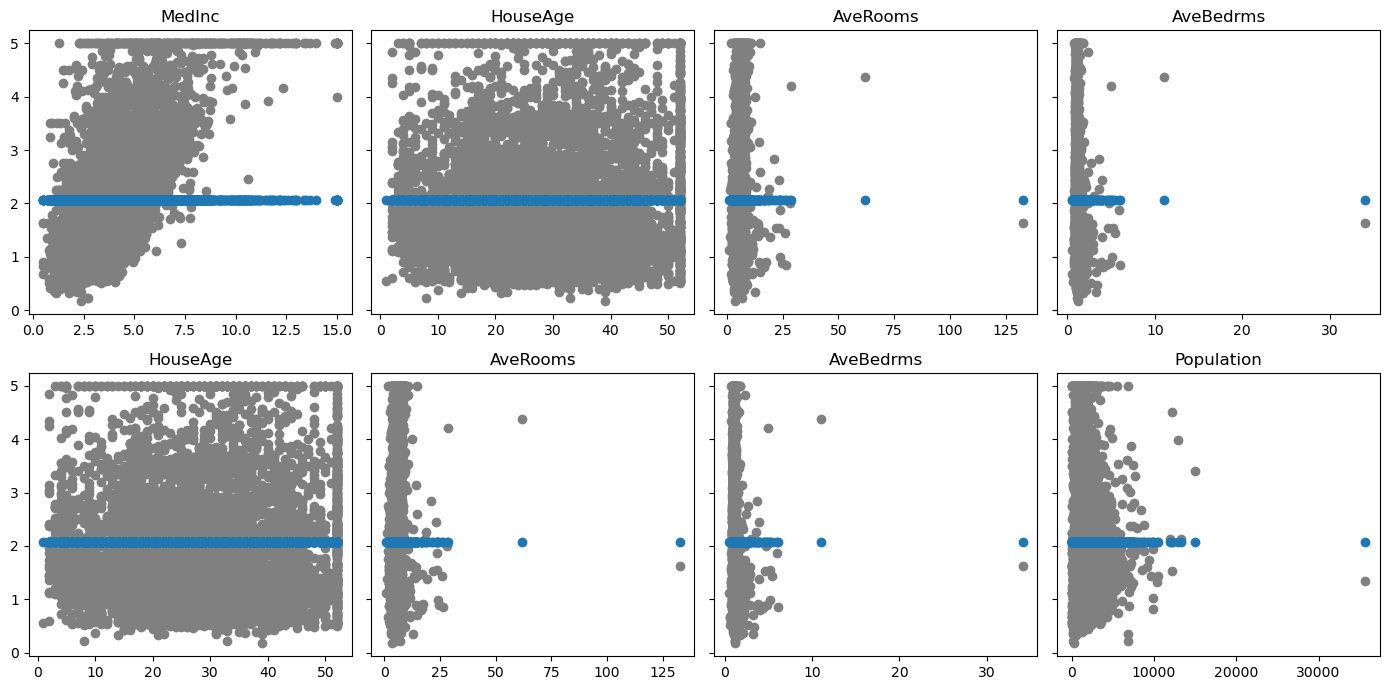

In [177]:
# Model 02:

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 7), sharey=True)
for row in range(0, 2):
    for col in range(0, 4):
        feature = df.columns[row+col]
        ax[row, col].scatter(df_test[feature].values, y_test, color='gray')
        ax[row, col].scatter(df_test[feature].values, y_hat_03, )
        ax[row, col].set_title(feature)
plt.tight_layout()
plt.show()




`Model 02 generalizes better!`